Epoch 0, Loss: 1.0035752058029175
Epoch 500, Loss: 0.3048146069049835
Epoch 1000, Loss: 0.12226997315883636
Epoch 1500, Loss: 0.048254966735839844
Epoch 2000, Loss: 0.02679823711514473
Epoch 2500, Loss: 0.01779334992170334
Epoch 3000, Loss: 0.01355165708810091
Epoch 3500, Loss: 0.011354707181453705
Epoch 4000, Loss: 0.009741335175931454
Epoch 4500, Loss: 0.008382221683859825
Epoch 5000, Loss: 0.007209358271211386
Epoch 5500, Loss: 0.006269367877393961
Epoch 6000, Loss: 0.005412888713181019
Epoch 6500, Loss: 0.004791892599314451
Epoch 7000, Loss: 0.004298594780266285
Epoch 7500, Loss: 0.0039018262177705765
Epoch 8000, Loss: 0.0035648939665406942
Epoch 8500, Loss: 0.0032660746946930885
Epoch 9000, Loss: 0.003001928562298417
Epoch 9500, Loss: 0.0027585842180997133


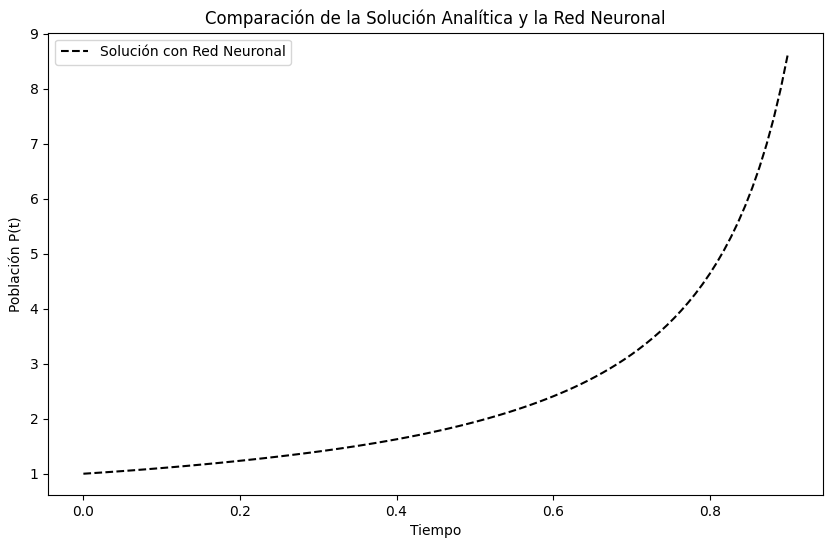

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación diferencial
r = 0.5   # Tasa de crecimiento
P0 = 1.0  # Población inicial

# Definir la clase para la red neuronal
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(1, 10), nn.GELU(),
            nn.Linear(10, 10), nn.GELU(),
            nn.Linear(10, 1)
        )

    def forward(self, t):
        return self.hidden(t)

# Método de Lagaris para la función de prueba P_hat
def P_hat(t, nn_model):
    # Solución de prueba: satisface la condición inicial
    return P0 + t * nn_model(t)

# Configurar los datos
t_values = torch.linspace(0, 0.9, 100).reshape(-1, 1)  # Rango de tiempo de 0 a 5
t_values.requires_grad = True  # Para calcular derivadas

# Inicializar el modelo, la función de pérdida y el optimizador
model = NeuralNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Entrenamiento de la red neuronal
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Predicción de la red neuronal
    P_pred = P_hat(t_values, model)

    # Calcular la derivada dP_hat/dt
    dP_dt = torch.autograd.grad(P_pred.sum(), t_values, create_graph=True)[0]

    # Definir la función de pérdida basada en la ecuación diferencial
    loss = loss_fn(dP_dt - P_pred**2, torch.zeros_like(dP_dt))

    # Actualizar los pesos
    loss.backward()
    optimizer.step()

    # Mostrar el progreso
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Solución analítica
t_np = t_values.detach().numpy().flatten()
P_analytic = -1/(t_np + P0)

# Solución de la red neuronal
P_nn = P_hat(t_values, model).detach().numpy().flatten()

# Graficar resultados
plt.figure(figsize=(10, 6))
#plt.plot(t_np, P_analytic, label="Solución Analítica", color="blue",linewidth=10,alpha=.3)
plt.plot(t_np, P_nn, label="Solución con Red Neuronal", color="black", linestyle="dashed")
plt.xlabel("Tiempo")
plt.ylabel("Población P(t)")
plt.legend()
plt.title("Comparación de la Solución Analítica y la Red Neuronal")
plt.show()
